# Understanding ROC Curves

The purpose of this notebook is to write a program demonstrating ROC curve, it should be seen in conjunction with this blog which explains theoritical aspects of ROC curve. In order to understand it better user should change the value of 'mean_difference'  and execute all cells again to see different plots.

In [2]:
#Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

The function below randomly generates different population distributions for 2000 datapoints, mean of the 'Healthy'  distribution is around 99, to create a distribuion for 'Not Healthy' close to healthy distribution  enter 'mean_difference'  parameter close to 3-10, in the cell below this, for seperated distribution keep it between 22-40, and execute all cells

In [47]:
mean_difference=7

In [48]:
def generate_number(num,diff):
    dis=np.random.randn(num,2)
    dis=100+dis*3
    dis[:,1]=dis[:,1]-diff


    dt=pd.DataFrame(dis[:,0])
    dt.rename(columns={0:'parameter'},inplace=True)
    dt['target']=0

    dt2=pd.DataFrame(dis[:,1])
    dt2.rename(columns={0:'parameter'},inplace=True)
    dt2['target']=1

    df=pd.concat([dt,dt2],axis=0)
    df=df.sample(frac=1)

    return df





In [49]:
data=generate_number(1000,mean_difference)

In [50]:
data.head()

,parameter,target
392,89.660589,1
391,102.585923,0
308,96.077352,1
707,100.190731,0
408,96.921477,0


Mean for healthy:  99.99416707252529
Mean for people with disease:  93.0976733065586


Text(0,0.5,'probaility')

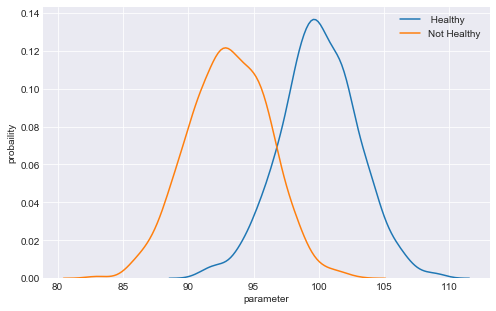

In [67]:
mean_healthy=data.loc[data.target==0].parameter.mean()
mean_not_healthy=data.loc[data.target==1].parameter.mean()

print('Mean for healthy: ',mean_healthy)
print('Mean for people with disease: ',mean_not_healthy)

plt.figure(figsize=(8,5))
sns.set_style('darkgrid')
sns.kdeplot(data.loc[data.target==0].parameter,label=' Healthy')
sns.kdeplot(data.loc[data.target==1].parameter,label='Not Healthy')
plt.xlabel('parameter')
plt.ylabel('probaility')

Let's import a Logistic Regression and create a model

In [52]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()

In [53]:
def split_data(disease_1000):
    X=disease_1000.iloc[:,0].values
    y=disease_1000.iloc[:,1].values

    x_train,x_test,y_train,y_test=train_test_split(X,y)

    x_train=x_train.reshape(-1,1)
    x_test=x_test.reshape(-1,1)
    print('Shapes')
    print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)
    return (x_train,x_test,y_train,y_test)

In [54]:
x_train,x_test,y_train,y_test=split_data(data)

Shapes
(1500, 1) (500, 1) (1500,) (500,)


Training the data

In [55]:
def model_fit_pred(x_train,x_test,y_train,y_test,model,prob):
    
    model.fit(x_train,y_train)
    pred_prob=model.predict_proba(x_test)
    pr_res=[]
    for i in pred_prob[:,0]:
        if i>prob:
            pr_res.append(0)
        else:
            pr_res.append(1)
    pred=np.array(pr_res)
    return pred
  

In [56]:
def get_conf_mat(x_train,x_test,y_train,y_test,model,prob):
    predictions= model_fit_pred(x_train,x_test,y_train,y_test,model,prob)
    #print(accuracy_score(y_test,pred))
    cm=confusion_matrix(predictions,y_test)
    return cm

In [57]:
cm=get_conf_mat(x_train,x_test,y_train,y_test,model,.5)

In [58]:
print(cm)

[[229  21]
 [ 25 225]]


In [59]:
print('TPR: ',cm[0,0]/cm[:,0].sum())
print('FPR: ',cm[0,1]/cm[:,1].sum())

TPR:  0.9015748031496063
FPR:  0.08536585365853659


In [60]:
prob_dis=np.linspace(.01,.99,50)

In [61]:
true_pos_rate=[]
false_pos_rate=[]
prob_list=[]
for i in prob_dis:
    cm=get_conf_mat(x_train,x_test,y_train,y_test,model,i)
    true_pos_rate.append(cm[0][0]/(cm[0][0]+cm[1][0]))
    false_pos_rate.append(cm[0][1]/(cm[0][1]+cm[1][1]))
    prob_list.append(i)


In [62]:
z2=zip(prob_list,false_pos_rate,true_pos_rate)
for a,b,c in z2:
    print(a,b,c)

0.01 1.0 1.0
0.03 1.0 1.0
0.05 1.0 1.0
0.06999999999999999 1.0 1.0
0.09 1.0 1.0
0.11 1.0 1.0
0.13 1.0 1.0
0.15000000000000002 1.0 1.0
0.17 0.991869918699187 1.0
0.19 0.991869918699187 1.0
0.21000000000000002 0.983739837398374 1.0
0.23 0.943089430894309 1.0
0.25 0.9105691056910569 1.0
0.27 0.8495934959349594 1.0
0.29000000000000004 0.7764227642276422 1.0
0.31 0.7317073170731707 1.0
0.33 0.6788617886178862 0.9960629921259843
0.35000000000000003 0.6219512195121951 0.9881889763779528
0.37 0.508130081300813 0.984251968503937
0.39 0.4105691056910569 0.984251968503937
0.41000000000000003 0.3617886178861789 0.9763779527559056
0.43 0.2926829268292683 0.9645669291338582
0.45 0.21951219512195122 0.9606299212598425
0.47000000000000003 0.16260162601626016 0.9330708661417323
0.49 0.12601626016260162 0.9015748031496063
0.51 0.06910569105691057 0.889763779527559
0.53 0.04878048780487805 0.84251968503937
0.55 0.036585365853658534 0.7992125984251969
0.5700000000000001 0.028455284552845527 0.744094488188

We see the value in the center gives a balanced TPR and FPR, these are the values near threshold .5

Text(0,0.5,'TPR')

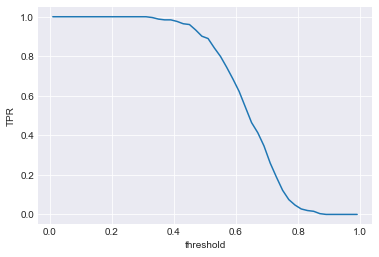

In [63]:
plt.plot(prob_list,true_pos_rate)
plt.xlabel('threshold')
plt.ylabel('TPR')


Text(0,0.5,'FPR')

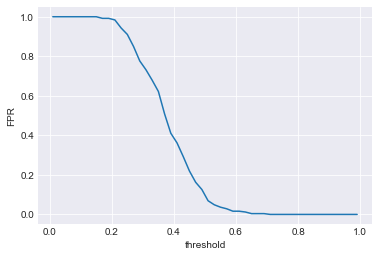

In [64]:
plt.plot(prob_list,false_pos_rate)
plt.xlabel('threshold')
plt.ylabel('FPR')

Text(0,0.5,'TPR')

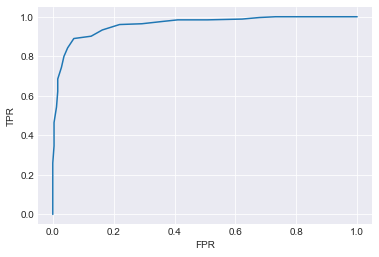

In [65]:
plt.plot(false_pos_rate,true_pos_rate)
plt.xlabel('FPR')
plt.ylabel('TPR')

This is the final ROC curve